<a href="https://colab.research.google.com/github/alyabdulfatah/classifaction/blob/master/Classification_with_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt


In [0]:
path = '/content/New Text Document (2).txt'
data = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])

In [0]:
print('data = ')
print(data.head(10) )
print('................................................')
print('data.describe = ')
print(data.describe())

data = 
     Test 1    Test 2  Accepted
0  0.051267  0.699560         1
1 -0.092742  0.684940         1
2 -0.213710  0.692250         1
3 -0.375000  0.502190         1
4 -0.513250  0.465640         1
5 -0.524770  0.209800         1
6 -0.398040  0.034357         1
7 -0.305880 -0.192250         1
8  0.016705 -0.404240         1
9  0.131910 -0.513890         1
................................................
data.describe = 
           Test 1      Test 2    Accepted
count  118.000000  118.000000  118.000000
mean     0.054779    0.183102    0.491525
std      0.496654    0.519743    0.502060
min     -0.830070   -0.769740    0.000000
25%     -0.372120   -0.254385    0.000000
50%     -0.006336    0.213455    0.000000
75%      0.478970    0.646562    1.000000
max      1.070900    1.108900    1.000000


In [0]:
positive = data[data['Accepted'].isin([1])]
negative = data[data['Accepted'].isin([0])]
print('................................................')
print('positive data')
print(positive.head(10))
print('................................................')
print('negative data')
print(negative.head(10))
print('................................................')


................................................
positive data
     Test 1    Test 2  Accepted
0  0.051267  0.699560         1
1 -0.092742  0.684940         1
2 -0.213710  0.692250         1
3 -0.375000  0.502190         1
4 -0.513250  0.465640         1
5 -0.524770  0.209800         1
6 -0.398040  0.034357         1
7 -0.305880 -0.192250         1
8  0.016705 -0.404240         1
9  0.131910 -0.513890         1
................................................
negative data
     Test 1    Test 2  Accepted
58  0.18376  0.933480         0
59  0.22408  0.779970         0
60  0.29896  0.619150         0
61  0.50634  0.758040         0
62  0.61578  0.728800         0
63  0.60426  0.597220         0
64  0.76555  0.502190         0
65  0.92684  0.363300         0
66  0.82316  0.275580         0
67  0.96141  0.085526         0
................................................


Text(0, 0.5, 'Test 2 Score')

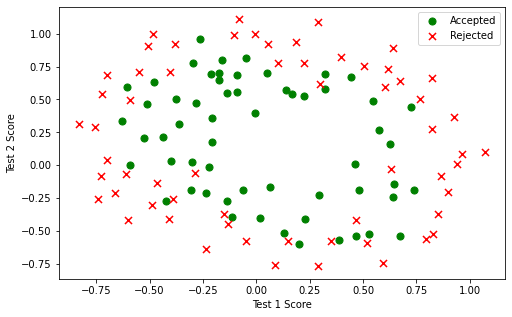

In [0]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(positive['Test 1'], positive['Test 2'],
           s=50, c='g', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'],
           s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')


In [0]:
x1 = data['Test 1']
x2 = data['Test 2']
print('x1 \n' ,x1.head(10))
print('................................................')
print('x2 \n' ,x2.head(10))

x1 
 0    0.051267
1   -0.092742
2   -0.213710
3   -0.375000
4   -0.513250
5   -0.524770
6   -0.398040
7   -0.305880
8    0.016705
9    0.131910
Name: Test 1, dtype: float64
................................................
x2 
 0    0.699560
1    0.684940
2    0.692250
3    0.502190
4    0.465640
5    0.209800
6    0.034357
7   -0.192250
8   -0.404240
9   -0.513890
Name: Test 2, dtype: float64


In [0]:
data.insert(3, 'Ones', 1)   # adding x0

print('data \n' , data.head(10))

data 
      Test 1    Test 2  Accepted  Ones
0  0.051267  0.699560         1     1
1 -0.092742  0.684940         1     1
2 -0.213710  0.692250         1     1
3 -0.375000  0.502190         1     1
4 -0.513250  0.465640         1     1
5 -0.524770  0.209800         1     1
6 -0.398040  0.034357         1     1
7 -0.305880 -0.192250         1     1
8  0.016705 -0.404240         1     1
9  0.131910 -0.513890         1     1


In [0]:
'''
x1 + x1^2 + x1x2 + x1^3 + x1^2 x2 + x1 x2^2 + x1^4 + x1^3 x2 + x1^2 x2^2 + x1 x2^3


F10 = x1

F20 = x1^2
F21 = x1 x2

F30 = x1^3
F31 = x1^2 x2
F32 = x1 x2^2

F40 = x1^4
F41 = x1^3 x2
F42 = x1^2 x2^2
F43 = x1 x2^3 

'''
degree = 5
for i in range(1, degree): # 1,2,3,4
    for j in range(0, i):  # 0 , 1 , 2 ,3
        data['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j) # i=3 , j=2

data.drop('Test 1', axis=1, inplace=True)
data.drop('Test 2', axis=1, inplace=True)

print('data \n' , data.head(10))


data 
    Accepted  Ones       F10  ...       F41       F42       F43
0         1     1  0.051267  ...  0.000094  0.001286  0.017551
1         1     1 -0.092742  ... -0.000546  0.004035 -0.029801
2         1     1 -0.213710  ... -0.006757  0.021886 -0.070895
3         1     1 -0.375000  ... -0.026483  0.035465 -0.047494
4         1     1 -0.513250  ... -0.062956  0.057116 -0.051818
5         1     1 -0.524770  ... -0.030319  0.012121 -0.004846
6         1     1 -0.398040  ... -0.002167  0.000187 -0.000016
7         1     1 -0.305880  ...  0.005502  0.003458  0.002173
8         1     1  0.016705  ... -0.000002  0.000046 -0.001103
9         1     1  0.131910  ... -0.001180  0.004595 -0.017901

[10 rows x 12 columns]


In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [0]:
def costReg(theta, X, y, lr ):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (lr / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    
     
    return np.sum(first - second) / (len(X)) + reg


In [0]:
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] =(np.sum(term)/len(X))+((learningRate/len(X))*theta[:,i])
    
    return grad


In [18]:
# set X and y (remember from above that we moved the label to column 0)
cols = data.shape[1]
print('cols = ' , cols)


cols =  12


In [19]:
X2 = data.iloc[:,1:cols]
print('X2 = ')
print(X2.head(10))
y2 = data.iloc[:,0:1]
print('y2 = ')
print(y2.head(10))

X2 = 
   Ones       F10       F20  ...       F41       F42       F43
0     1  0.051267  0.002628  ...  0.000094  0.001286  0.017551
1     1 -0.092742  0.008601  ... -0.000546  0.004035 -0.029801
2     1 -0.213710  0.045672  ... -0.006757  0.021886 -0.070895
3     1 -0.375000  0.140625  ... -0.026483  0.035465 -0.047494
4     1 -0.513250  0.263426  ... -0.062956  0.057116 -0.051818
5     1 -0.524770  0.275384  ... -0.030319  0.012121 -0.004846
6     1 -0.398040  0.158436  ... -0.002167  0.000187 -0.000016
7     1 -0.305880  0.093563  ...  0.005502  0.003458  0.002173
8     1  0.016705  0.000279  ... -0.000002  0.000046 -0.001103
9     1  0.131910  0.017400  ... -0.001180  0.004595 -0.017901

[10 rows x 11 columns]
y2 = 
   Accepted
0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1


In [20]:
# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(X2.shape[1])

print('theta 2 = ' , theta2)

theta 2 =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [48]:
learningRate = 0.000001  #alpha
rcost = costReg(theta2, X2, y2, learningRate)
print('regularized cost = ' , rcost)

regularized cost =  0.6931471805599454


In [49]:
result = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg,
                      args=(X2, y2, learningRate))
print( 'result = ' , result )

result =  (array([  0.79755   ,   1.04532695,   4.46139482,  -7.47929797,
         2.11743395,   6.11027039,  -1.1949781 , -11.81500485,
         2.48935704, -22.92615515,   6.87510966]), 96, 4)


In [50]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))


accuracy = 90%
